In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [9]:
data = np.genfromtxt('./data5-1.csv', delimiter=',')
data

array([70195., 37974., 60233., ..., 62871., 22912., 27939.])

In [21]:
print(f"Variance: {(np.std(data)**2).round(3)}")
print(f"Standard deviation: {np.std(data).round(3)}")

Variance: 295350290.299
Standard deviation: 17185.758


(27884.53525, 17187.906979482443)

In [99]:
norm_data = (data - data.min()) / (data.max() - data.min())
norm_data

array([0.63767811, 0.34318304, 0.54662694, ..., 0.57073786, 0.20551864,
       0.25146466])

<ipython-input-183-d8b33fd2694a>:35: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(labels=ticks)


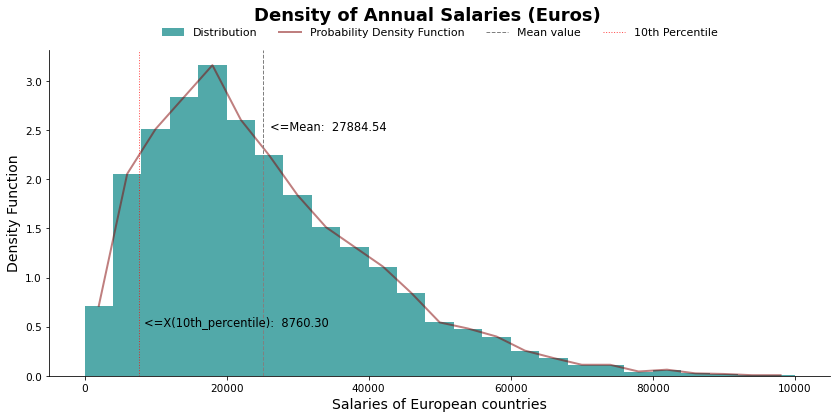

In [183]:
# Creating a wide figure to accomodate the distribution.
fig = plt.figure(figsize=(14,6))


n_bins = 25
norm_mean_val = np.mean(norm_data)
mean_val = np.mean(data)


# Manually calculated as np.sort(data[:int(data.shape[0] * 0.10 + 1)]).max()
X_norm = np.percentile(norm_data, 10)
X = np.percentile(data, 10)


hist, bin_edges = np.histogram(norm_data, bins=n_bins, density=True)
bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2
bin_width = bin_edges[1] - bin_edges[0]


pd_function = hist / (np.sum(hist) * bin_width)


plt.hist(norm_data, bins=n_bins, density=True, alpha=0.68, color='teal', label='Distribution')
plt.plot(bin_centers, pd_function, color='maroon', linewidth=2, alpha=0.5, label='Probability Density Function')
plt.axvline(norm_mean_val, color='gray', linewidth=1, linestyle='dashed', label='Mean value')
plt.axvline(X_norm, color='red', linewidth=1, alpha=0.7, linestyle='dotted', label='10th Percentile')


text = f'<=Mean: {mean_val: .2f}'
text_percentile = f'<=X(10th_percentile): {X: .2f}'
plt.text(norm_mean_val+0.01, y=2.5, s=text, fontsize=11.5)
plt.text(X_norm+0.008, y=0.5, s=text_percentile, fontsize=11.5)


plt.xlabel('Salaries of European countries', fontsize=14)
plt.ylabel('Density Function', fontsize=14)
plt.suptitle('Density of Annual Salaries (Euros)', fontsize=18, fontweight='bold')
plt.legend(frameon=False, fontsize=11, ncols=4, loc='upper center', borderaxespad=-2.4)


ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ticks = [0, 0, 20000, 40000, 60000, 80000, 10000]
ax.set_xticklabels(labels=ticks)
ax.tick_params(labelsize=10.5)


plt.show()